O Estudo de caso tem como objetivo a aprendizagem de técnicas de pandas e visualização de dados usando o matplotlib e seaborn. Para esta EDA foi utilizado o dataset disponível no seguinte link: https://www.kaggle.com/datasets/wenruliu/adult-income-dataset?select=adult.csv


In [161]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [162]:
data = pd.read_csv('/content/drive/MyDrive/Datasets - projetos/adult.csv')
data.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [163]:
data.tail(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48832,32,Private,34066,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K
48833,43,Private,84661,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K
48834,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
48835,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
48836,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [164]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [165]:
data.shape

(48842, 15)

In [166]:
print("Número de linhas:", data.shape[0])
print("Número de colunas:", data.shape[1])

Número de linhas: 48842
Número de colunas: 15


In [167]:
# buscar amostras aleatórias do dataset (50%)
data_1 = data.sample(frac=0.50, random_state = 100) #random_state garante que a cada execução seja gerado mesmo conjunto de dados
data_1.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
12393,37,Private,110331,Prof-school,15,Married-civ-spouse,Other-service,Wife,White,Female,0,0,60,United-States,>50K
48701,23,Private,45834,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,50,United-States,<=50K
17918,28,Private,89718,HS-grad,9,Never-married,Sales,Not-in-family,White,Female,2202,0,48,United-States,<=50K
11352,30,Private,351770,9th,5,Divorced,Other-service,Unmarried,White,Female,0,0,38,United-States,<=50K
36198,31,Private,164190,10th,6,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K
14102,18,Private,211683,12th,8,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,20,United-States,<=50K
41731,28,Private,452808,10th,6,Never-married,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
23995,47,Local-gov,123681,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,7688,0,60,United-States,>50K
36248,37,Private,151771,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
12244,76,Private,82628,7th-8th,4,Married-civ-spouse,Other-service,Husband,White,Male,0,0,45,United-States,<=50K


In [168]:
# checagem de nulos

data.isnull() #este método retorna booleano

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48838,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48839,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48840,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [169]:
data.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


<Axes: >

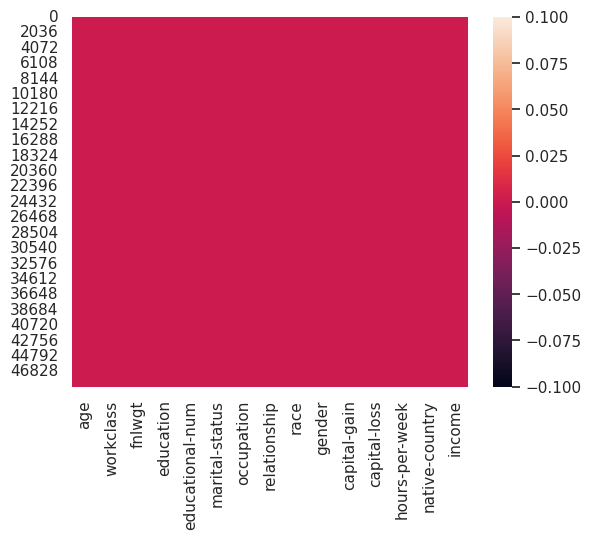

In [170]:
# Mapa de calor para visualização de nulos
sns.heatmap(data.isnull())

In [171]:
# Trocar ? por NaN
data.tail()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [172]:
data.isin(['?']) #visualizar quais linhas e colunas possuem o valor ?

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48838,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48839,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48840,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [173]:
data.isin(['?']).sum()

,0
age,0
workclass,2799
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,2809
relationship,0
race,0
gender,0


In [174]:
data.columns # lista com os nomes das colunas

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [175]:
# fazendo a troca de ? por NaN usando o método replace numpy

data['workclass']= data['workclass'].replace('?', np.nan)
data['occupation']= data['occupation'].replace('?', np.nan)
data['native-country']= data['native-country'].replace('?', np.nan)

In [176]:
data.isnull().sum()

,0
age,0
workclass,2799
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,2809
relationship,0
race,0
gender,0


<Axes: >

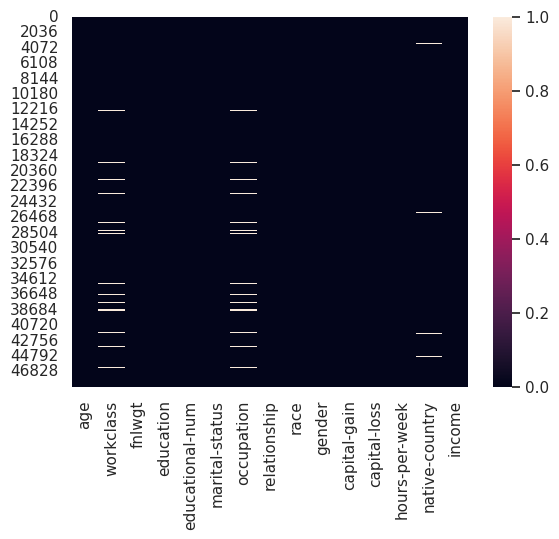

In [177]:
sns.heatmap(data.isnull())

In [178]:
# verificar a % de valores nulos do df
perct_valores_nulos = data.isnull().sum()*100/len(data)
print(perct_valores_nulos)

age                0.000000
workclass          5.730724
fnlwgt             0.000000
education          0.000000
educational-num    0.000000
marital-status     0.000000
occupation         5.751198
relationship       0.000000
race               0.000000
gender             0.000000
capital-gain       0.000000
capital-loss       0.000000
hours-per-week     0.000000
native-country     1.754637
income             0.000000
dtype: float64


In [179]:
# excluir valores nulos do df

data.dropna(how = 'any', inplace=True) # how = any - Remove qualquer valor que seja NaN, inplace = True - garante que seja feita a alteração no df original
data.shape

(45222, 15)

In [180]:
# verificar dados duplicados

duplicados = data.duplicated().any()
print(f'Existem dados duplicados no df: {duplicados}')

Existem dados duplicados no df: True


In [181]:
data = data.drop_duplicates()

In [182]:
data.shape #verificar a quantidade de linhas removidas

(45175, 15)

In [183]:
data.describe(include = 'all')

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
count,45175.000000,45175,4.517500e+04,45175,45175.000000,45175,45175,45175,45175,45175,45175.000000,45175.000000,45175.000000,45175,45175
unique,NaN,7,NaN,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Craft-repair,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,33262,NaN,14770,NaN,21042,6010,18653,38859,30495,NaN,NaN,NaN,41256,33973
mean,38.556170,NaN,1.897388e+05,NaN,10.119314,NaN,NaN,NaN,NaN,NaN,1102.576270,88.687593,40.942512,NaN,NaN
std,13.215349,NaN,1.056524e+05,NaN,2.551740,NaN,NaN,NaN,NaN,NaN,7510.249876,405.156611,12.007730,NaN,NaN
min,17.000000,NaN,1.349200e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.173925e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783120e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,47.000000,NaN,2.379030e+05,NaN,13.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [184]:
# verificar o conteúdo das colunas education e educational-num, já que aparentam possuir as mesmas informações

data['education'].unique()

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', '5th-6th',
       'Assoc-voc', '9th', 'Doctorate', '12th', '1st-4th', 'Preschool'],
      dtype=object)

In [185]:
data['educational-num'].unique()

array([ 7,  9, 12, 10,  6, 15,  4, 13, 14,  3, 11,  5, 16,  8,  2,  1])

In [186]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [187]:
# já que possuem as mesmas informações vamos excluir a coluna de educational-num

data = data.drop(['educational-num', 'capital-gain', 'capital-loss'], axis =1)

# **Análise univariada**

## Qual é a distribuição da idade?

In [188]:
data['age'].describe()

,age
count,45175.000000
mean,38.556170
std,13.215349
min,17.000000
25%,28.000000
50%,37.000000
75%,47.000000
max,90.000000


<Axes: >

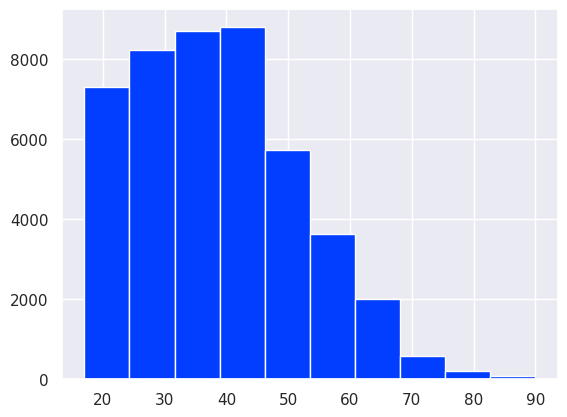

In [189]:
sns.set_theme(style = 'dark', palette = 'bright', context = 'notebook')
data['age'].hist()

## Encontre o total de pessoas que possuem idade entre 17 e 48 anos usando o método Between.

In [190]:
#sem usar o método between
total_pessoas = sum((data['age']>= 17) & (data['age']<=48))
print(f'O total de pessoas com idade entre 17 e 48 anos é de {total_pessoas}.')

O total de pessoas com idade entre 17 e 48 anos é de 34858.


In [191]:
# usando o método between

total_between = sum(data['age'].between(17,48))
print(f'O total de pessoas com idade entre 17 e 48 anos é de {total_between}.')

O total de pessoas com idade entre 17 e 48 anos é de 34858.


## Qual a distribuição para a classe de trabalho?

In [192]:
data['workclass'].describe()

,workclass
count,45175
unique,7
top,Private
freq,33262


<Axes: >

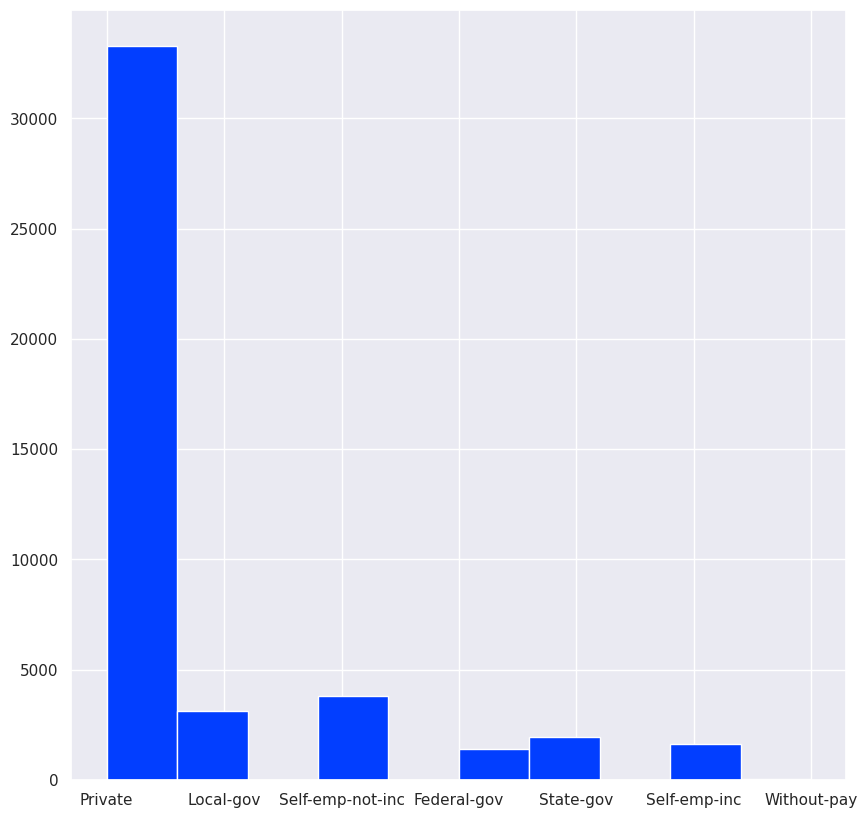

In [193]:
plt.figure(figsize=(10,10))
data['workclass'].hist()

## Quantas pessoas possuem graduação ou mestrado?

In [194]:
data['education'].describe()

,education
count,45175
unique,16
top,HS-grad
freq,14770


In [195]:
filtro_grad = data['education'] == 'Bachelors'
filtro_mestrado = data['education'] == 'Masters'

In [196]:
data[filtro_grad | filtro_mestrado] # retorna os dados em que os filtros se aplicam

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
11,36,Federal-gov,212465,Bachelors,Married-civ-spouse,Adm-clerical,Husband,White,Male,40,United-States,<=50K
15,43,Private,346189,Masters,Married-civ-spouse,Exec-managerial,Husband,White,Male,50,United-States,>50K
20,34,Private,107914,Bachelors,Married-civ-spouse,Tech-support,Husband,White,Male,47,United-States,>50K
23,25,Private,220931,Bachelors,Never-married,Prof-specialty,Not-in-family,White,Male,43,Peru,<=50K
24,25,Private,205947,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,Male,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
48817,34,Private,160216,Bachelors,Never-married,Exec-managerial,Not-in-family,White,Female,55,United-States,>50K
48819,38,Private,139180,Bachelors,Divorced,Prof-specialty,Unmarried,Black,Female,45,United-States,>50K
48825,31,Private,199655,Masters,Divorced,Other-service,Not-in-family,Other,Female,30,United-States,<=50K
48834,32,Private,116138,Masters,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,11,Taiwan,<=50K


In [197]:
total_ensino_superior = len(data[filtro_grad | filtro_mestrado])
print(f'O total de pessoas com graduação ou mestrado é de {total_ensino_superior}')

O total de pessoas com graduação ou mestrado é de 10072


In [198]:
# outro método usando sum()
sum(data['education'].isin(['Bachelors', 'Masters']))

10072

## **Análise bivariada**

In [75]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'hours-per-week',
       'native-country', 'income'],
      dtype='object')

## Avaliar a reação entre salário e idade usando o boxplot.

<Axes: xlabel='income', ylabel='age'>

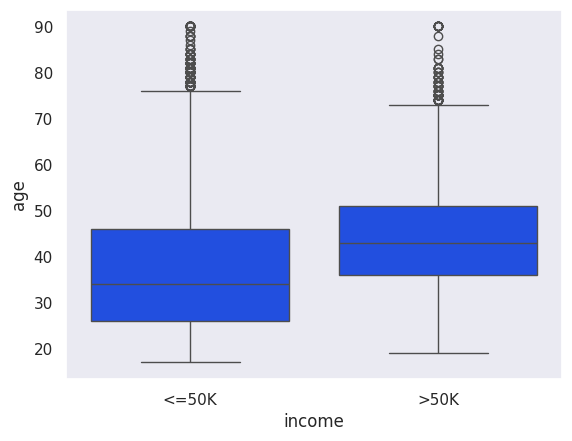

In [199]:
sns.boxplot(x= 'income', y='age', data=data)

## Alterar a coluna de income trocando <=50k e >50k por 0 e 1, respectivamente.

In [200]:
# verificar a quantidade para cada faixa salarial
data['income'].value_counts()

,count
income,
<=50K,33973
>50K,11202


<Axes: xlabel='income', ylabel='count'>

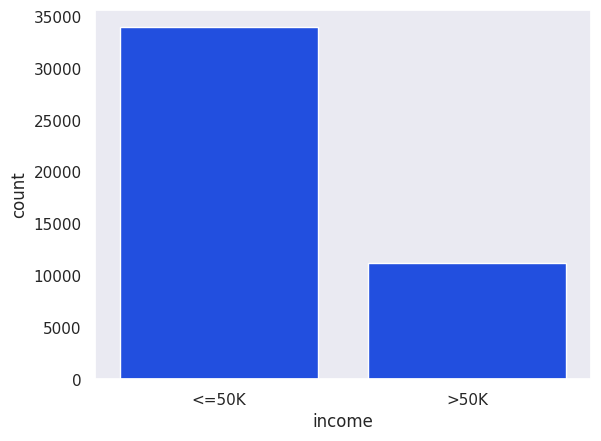

In [201]:
sns.countplot(x= 'income', data=data)

In [202]:
def income_data(salario):
  if salario == '<=50K':
    return 0
  else:
    return 1


In [203]:
data['salario_codificado'] = data['income'].apply(income_data)

In [140]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,salario_codificado
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0,1
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0,1
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1,1
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,0,1


In [204]:
# usando o método replace

data.replace(to_replace=['<=50K', '>50K'], value=[0,1], inplace = True)

<ipython-input-204-c6deb10f34e3>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace(to_replace=['<=50K', '>50K'], value=[0,1], inplace = True)


In [205]:
data.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income,salario_codificado
0,25,Private,226802,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,0,0
1,38,Private,89814,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,0,0
2,28,Local-gov,336951,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,1,1
3,44,Private,160323,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,1,1
5,34,Private,198693,10th,Never-married,Other-service,Not-in-family,White,Male,30,United-States,0,0


In [206]:
data = data.drop('salario_codificado', axis= 1)

## Qual classe trabalhadora ganha o maior salário?

In [207]:
maior_salario = data.groupby('workclass')['income'].mean().sort_values(ascending = False)
print(maior_salario)

workclass
Self-emp-inc        0.554407
Federal-gov         0.390469
Local-gov           0.295161
Self-emp-not-inc    0.279051
State-gov           0.267215
Private             0.217816
Without-pay         0.095238
Name: income, dtype: float64


## Quem possui maiores chances de conseguir um salário maior do que 50K, homens ou mulheres?

In [208]:
maior_salario_genero = data.groupby('gender')['income'].mean().sort_values(ascending=False)
print(maior_salario_genero)

gender
Male      0.312609
Female    0.113692
Name: income, dtype: float64


##Média salarial com base na raça

In [209]:
data.dtypes

,0
age,int64
workclass,object
fnlwgt,int64
education,object
marital-status,object
occupation,object
relationship,object
race,object
gender,object
hours-per-week,int64


In [210]:
data['race'] = data['race'].astype(str)

In [211]:
media_salario_raca = data.groupby('race')['income'].mean().sort_values(ascending=False)
print(media_salario_raca)

race
Asian-Pac-Islander    0.283628
White                 0.262513
Other                 0.127479
Black                 0.126331
Amer-Indian-Eskimo    0.121839
Name: income, dtype: float64


##Média de salário por ocupação

In [212]:
data['occupation'] = data['occupation'].astype(str)

In [213]:
media_salario_ocupacao = data.groupby('occupation')['income'].mean().sort_values(ascending=False)
print(media_salario_ocupacao)

occupation
Exec-managerial      0.479097
Prof-specialty       0.450258
Protective-serv      0.314872
Tech-support         0.289641
Armed-Forces         0.285714
Sales                0.269195
Craft-repair         0.225291
Transport-moving     0.206390
Adm-clerical         0.136585
Machine-op-inspct    0.122766
Farming-fishing      0.116610
Handlers-cleaners    0.066015
Other-service        0.040791
Priv-house-serv      0.013043
Name: income, dtype: float64


## Correlação entre o total de horas de trabalho por semana e idade com o salário

In [214]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'hours-per-week',
       'native-country', 'income'],
      dtype='object')

In [215]:
colunas = ['age', 'income', 'hours-per-week']
salario_corr = data[colunas].corr(numeric_only=True)['income'].drop('income').sort_values(ascending = False)
print(salario_corr)

age               0.236839
hours-per-week    0.227146
Name: income, dtype: float64


<ipython-input-216-e0d1a9fee2fe>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  b = sns.barplot(x =salario_corr.index, y =salario_corr.values, palette = 'coolwarm', ax = ax); # index para pegar apenas os índices e values para pegar os valores, já que estamos trabalhando com uma série do pandas


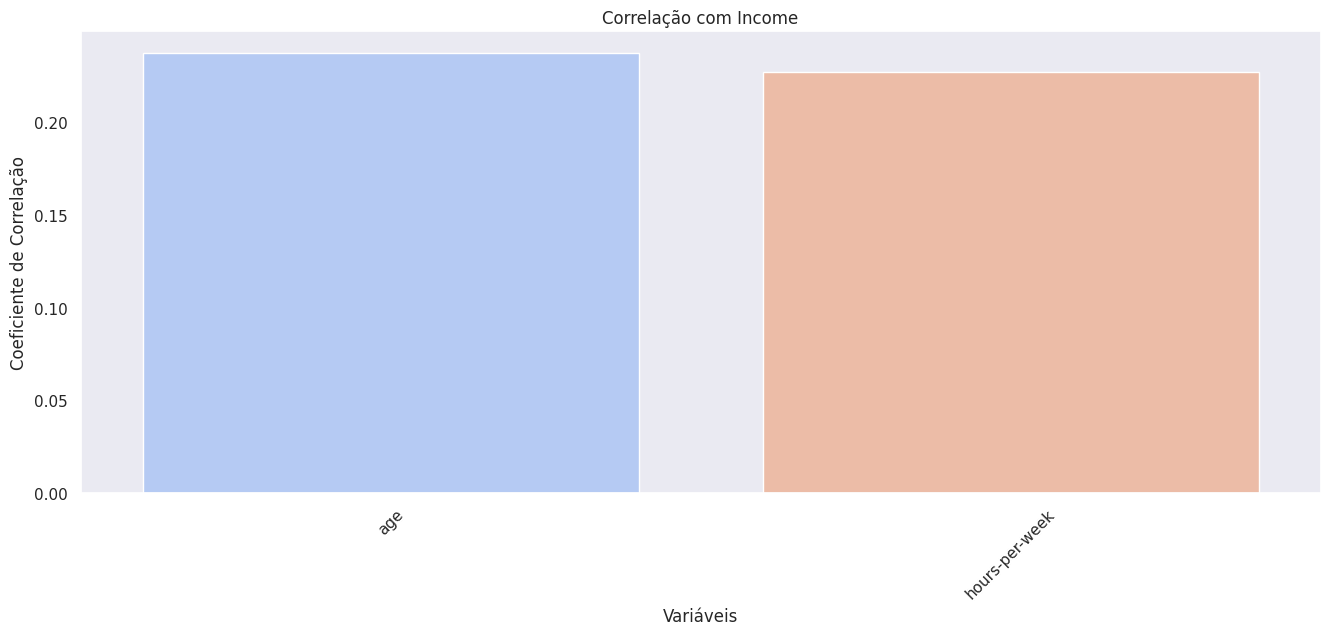

In [216]:
fig, ax = plt.subplots(figsize = (16,6))

b = sns.barplot(x =salario_corr.index, y =salario_corr.values, palette = 'coolwarm', ax = ax); # index para pegar apenas os índices e values para pegar os valores, já que estamos trabalhando com uma série do pandas

b.tick_params(axis = 'x', rotation = 45)
plt.title('Correlação com Income')
plt.ylabel('Coeficiente de Correlação')
plt.xlabel('Variáveis')
plt.show()

## Converter a coluna de workclass para o tipo Category Datatype

In [217]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45175 entries, 0 to 48841
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45175 non-null  int64 
 1   workclass       45175 non-null  object
 2   fnlwgt          45175 non-null  int64 
 3   education       45175 non-null  object
 4   marital-status  45175 non-null  object
 5   occupation      45175 non-null  object
 6   relationship    45175 non-null  object
 7   race            45175 non-null  object
 8   gender          45175 non-null  object
 9   hours-per-week  45175 non-null  int64 
 10  native-country  45175 non-null  object
 11  income          45175 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 4.5+ MB


In [218]:
data['workclass'] = data['workclass'].astype('category')

In [219]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45175 entries, 0 to 48841
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             45175 non-null  int64   
 1   workclass       45175 non-null  category
 2   fnlwgt          45175 non-null  int64   
 3   education       45175 non-null  object  
 4   marital-status  45175 non-null  object  
 5   occupation      45175 non-null  object  
 6   relationship    45175 non-null  object  
 7   race            45175 non-null  object  
 8   gender          45175 non-null  object  
 9   hours-per-week  45175 non-null  int64   
 10  native-country  45175 non-null  object  
 11  income          45175 non-null  int64   
dtypes: category(1), int64(4), object(7)
memory usage: 4.2+ MB
